

> **Topic Modeling through LDA(Latent Dirichlet Allocation) of Student's Feedback**



In [1]:
!pip install PyDrive
!pip install gensim
#!pip install pyldavis
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 25.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [2]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
!pip install pyLDAvis==3.2.2

In [4]:
import pandas as pd
#pd.set_option("display.max_colwidth", 200)
import numpy as np
import json
import re
import gzip
import spacy

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [5]:
df=pd.read_csv('Responses.csv')
print(df.head(5))

   Resp ID  ...                                          Responses
0        1  ...  Who will responsible for students carrier beca...
1        2  ...  Taking ongoing online classes is quite tedious...
2        3  ...             Financial problem no network coverage 
3        4  ...  In this pandemic no hope from anyone nobody ca...
4        5  ...  however my college is not helping/ demanding f...

[5 rows x 21 columns]


In [6]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)
    
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [7]:

df.shape

(1182, 21)

In [8]:
def freq_words(x, terms = 20):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(18,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

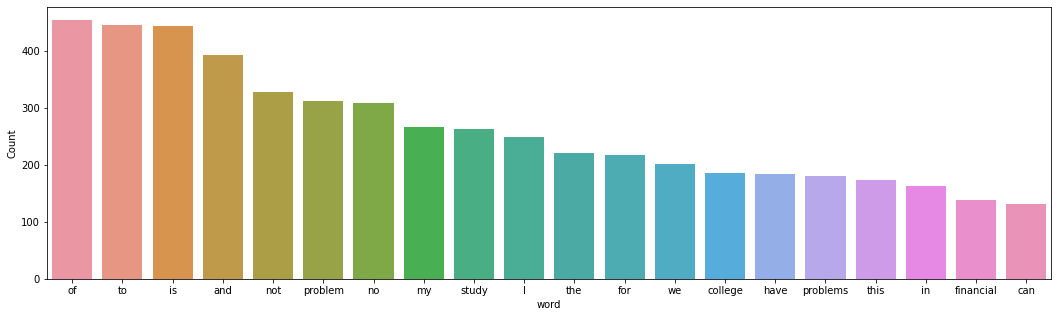

In [9]:
freq_words(df['Responses'])

In [10]:
# replace "n't" with " not"
df['Responses'] = df['Responses'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
df['Responses'] = df['Responses'].str.replace("[^a-zA-Z#]", " ")

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [12]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [13]:
# remove short words (length < 2)
df['Responses'] = df['Responses'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
tweets = [remove_stopwords(r.split()) for r in df['Responses']]

# make entire text lowercase
tweets = [r.lower() for r in tweets]

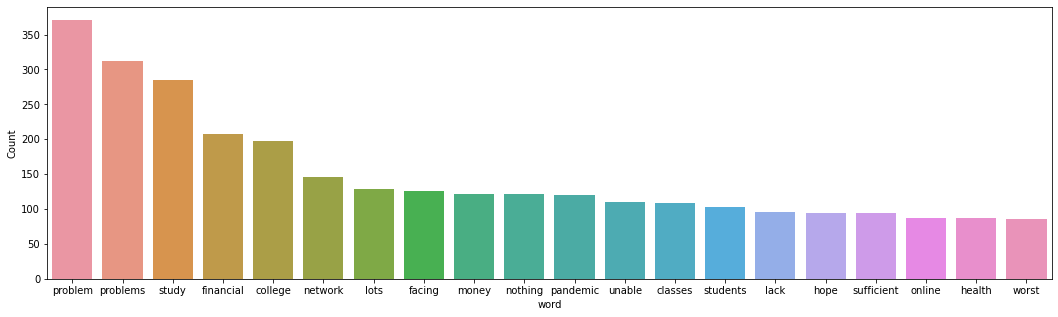

In [14]:
freq_words(tweets, 20)

In [15]:
nlp = spacy.load('en', disable=['parser', 'ner'])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [16]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [17]:
tokenized_tweets = pd.Series(tweets).apply(lambda x: x.split())
print(tokenized_tweets[1])

['taking', 'ongoing', 'online', 'classes', 'quite', 'tedious', 'another', 'issue', 'staying', 'motivated', 'entire', 'family', 'including', 'became', 'optimistic', 'face', 'financial', 'difficulties']


In [18]:
print(tokenized_tweets[1])
len(tokenized_tweets[1])

['taking', 'ongoing', 'online', 'classes', 'quite', 'tedious', 'another', 'issue', 'staying', 'motivated', 'entire', 'family', 'including', 'became', 'optimistic', 'face', 'financial', 'difficulties']


18

In [ ]:
tweets_2 = lemmatization(tokenized_tweets)
print(tweets_2[1])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
print(tweets_2[3])
len(tweets_2[3])

In [ ]:
set(tokenized_tweets[1]) - set(tweets_2[1])

In [ ]:
tweets_3 = []
for i in range(len(tweets_2)):
    tweets_3.append(' '.join(tweets_2[i]))
    
df['tweets'] = tweets_3

In [ ]:
freq_words(df['Responses'], 20)

In [ ]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(tweets_2)

In [ ]:
# Convert list of tweets (tweets_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tweets_2]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [ ]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=3, 
                random_state=100,
                chunksize=50,
                passes=50)

In [ ]:
lda_model.print_topics()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

In [ ]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

In [ ]:
#creating wordcloud 
from wordcloud import WordCloud  
WordCloud
from  nltk.corpus import stopwords #for stopwords 

In [ ]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(tokenized_tweets) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)